# Boston Housing Pricing 

**In this project we will access several data from the census of Boston regarding past housing data in order to ty to answer to the following questions**

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

### Importing the data set

In [49]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(url)
df.columns = df.columns.str.lower()
df.head()

,unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### List of variables

CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### Generating descriptive statistics and visualizations

In [23]:
!pip install scipy
!pip install seaborn
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

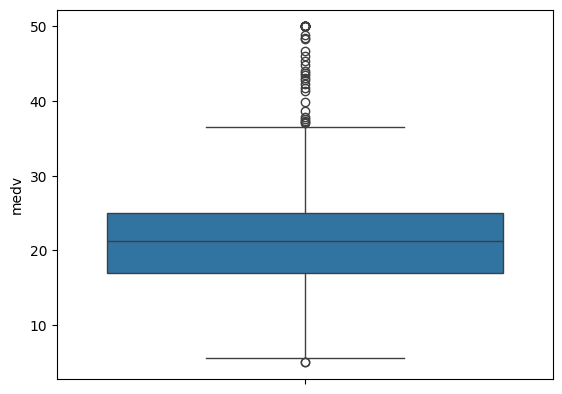

In [50]:
# Box plot of Median value of owner-occupied homes
ax = sns.boxplot(y = df['medv'])
plt.show()

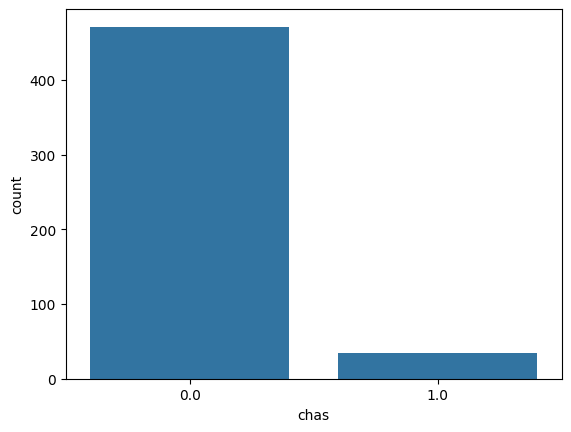

In [51]:
ax = sns.countplot(x = df['chas'])

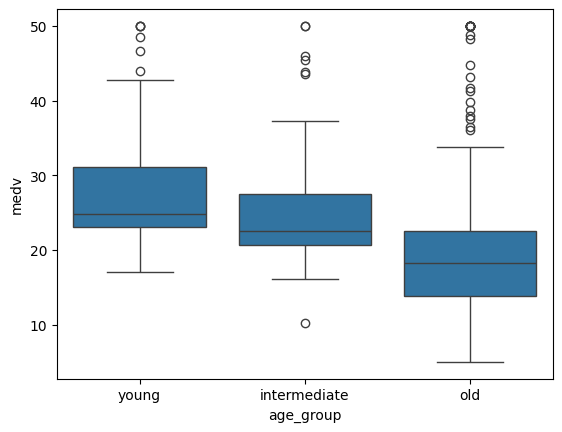

In [52]:
max_age = df['age'].max()
df['age_group'] = pd.cut(
    df['age'],
    bins = [0,35,70,max_age],
    labels = ['young', 'intermediate','old'],
    include_lowest = True
)
ax = sns.boxplot(x = df['age_group'], y = df['medv'])
plt.show()

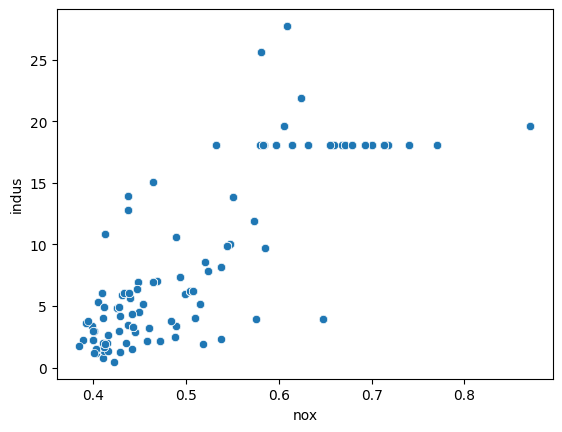

In [53]:
ax = sns.scatterplot(data = df, x = df['nox'], y = df['indus'])
plt.show()

In [21]:
# We can observe how higer levels of Nox lead to a decrease in the number of non-retail business.

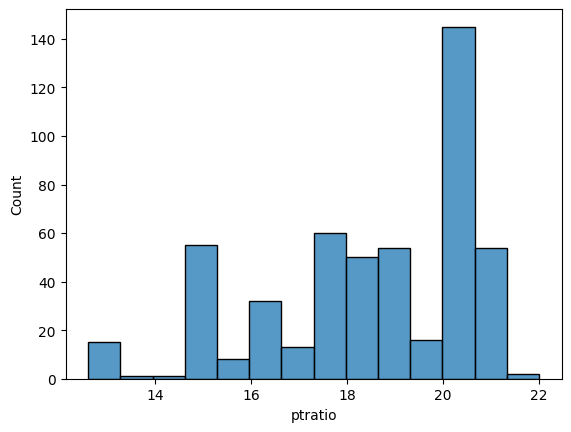

In [54]:
ax = sns.histplot(df['ptratio'])
plt.show()

## Testing hypothesis ###

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



In [26]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_group
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,intermediate
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,intermediate
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,intermediate
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,intermediate


In [55]:
# first we determine if there is variance correlation
stats.levene(df[df['chas']==1]['medv'],
                   df[df['chas']==0]['medv'],center = 'mean')
# as p value <0.05 we reject tye null hypothesis and therefore we reject H0 and not assume equal variances

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

In [56]:
stats.ttest_ind(df[df['chas']==1]['medv'],
                   df[df['chas']==0]['medv'],equal_var = False)
# and as the p value < 0.05 we reject the null hypothesis and conclude that there is a significant difference between the medv if it bounds the rives or if it not

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [57]:
# first we determine if there is variance correlation
stats.levene(df[df['age_group']=='young']['medv'],
                   df[df['age_group']=='intermediate']['medv'],
            df[df['age_group']=='old']['medv'],center = 'mean')
# as p value >0.05 we fail to reject tye null hypothesis and therefore we assume equal variances

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

In [58]:
group1 = df[df['age_group']=='young']['medv']
group2 = df[df['age_group']=='intermediate']['medv']
group3 = df[df['age_group']=='old']['medv']

stats.f_oneway(group1,group2,group3)
# as p value >0.05 we fail to reject tye null hypothesis and conlude that there is no difference in medv across different age groups

F_onewayResult(statistic=np.float64(36.40764999196598), pvalue=np.float64(1.7105011022702984e-15))

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [59]:
# As we have already plotted the scatter plot above we wont do it here. We already saw kind of a relationship in it but lets see if it is statistically relevant
stats.pearsonr(df['nox'],df['chas'])
# as p value < 0.05 we reject h0 and conclude that thre is enough statistical evidence to assume a relation between bot variables.

PearsonRResult(statistic=np.float64(0.09120280684249511), pvalue=np.float64(0.04029050097282844))

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [43]:
!pip install statsmodels
import statsmodels.api as sm

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 10.2 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 21.2 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --------------

In [60]:
# first here we will define our indendent variable (x) and the dependent one (y)
# x = weighted distance to the five boston employment centres
# y = medv
# y = bo + b1*x
# now for the sake of theory we will write down our hypothesis:
# H0: b1 = 0 so distance has no effect
# h1: b1 =! 0 distance has effect
X = df['dis']
y = df['medv']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()
# as we see that pvalue < 0.05 we reject the null hypothesis and conclude that there is a relationship between the distance to the 5 boston centers and the medv

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        13:11:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""